In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Open the csv file of actors
financials = pd.read_csv('./../cleaned_datasets/financial_data_no_budget.csv')
financials_bud = pd.read_csv('./../cleaned_datasets/financial_data.csv')
movies = pd.read_csv('./../cleaned_datasets/movies_clean.csv')

# 1. Data prep

In [3]:
data = financials_bud.merge(movies, left_on=["original_title", "year_release", "runtime"], right_on=["name", "year_release" , "runtime"], how='left')
data = data.drop(columns=["revenue", "name", 'wikipedia_id', 'freebase_id', 'release_date',
       'languages', 'countries', 'genres'])
data = data.dropna(subset=["revenue_final_adjusted" , "budget_adjusted", "averageRating"])
data


,original_title,runtime,year_release,budget_adjusted,revenue_final_adjusted,averageRating,numVotes,average_award_cumcount,average_movies_cumcount,award_cumcount,movies_cumcount
0,The Cheat,59.0,1915,173795,1379092,6.5,2709.0,0.000000,0.333333,0.0,3.0
7,The Unholy Three,86.0,1925,1034080,7067892,7.2,2117.0,0.000000,3.250000,0.0,26.0
13,Flesh and the Devil,112.0,1926,3744778,6606069,7.6,4533.0,0.000000,1.444444,0.0,13.0
17,Lights of New York,57.0,1928,752971,12047543,5.7,907.0,0.000000,2.000000,0.0,6.0
19,West of Zanzibar,65.0,1928,2600261,9246489,7.2,1915.0,0.250000,7.750000,1.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...
4588,Killing Them Softly,97.0,2012,19515604,49349062,6.2,150251.0,0.333333,8.533333,5.0,128.0
4595,Bachelorette,87.0,2012,3903120,15544769,5.3,48378.0,0.000000,6.000000,0.0,66.0
4598,The Cold Light of Day,93.0,2012,26020805,21940200,4.9,38954.0,0.076923,5.230769,1.0,68.0
4600,That's My Boy,116.0,2012,91072819,75536274,5.5,106484.0,0.000000,6.000000,0.0,90.0


# 2. Correlation Analysis

In [35]:
correlation = data[['averageRating', 'revenue_final_adjusted']].corr(method='pearson')
print(correlation)

correlation = data[['averageRating', 'revenue_final_adjusted']].corr(method='spearman')
print(correlation)

                        averageRating  revenue_final_adjusted
averageRating                1.000000                0.212517
revenue_final_adjusted       0.212517                1.000000
                        averageRating  revenue_final_adjusted
averageRating                1.000000                0.198105
revenue_final_adjusted       0.198105                1.000000


Slight positive correlation

# 3. Scatter plot with regression line

/Users/timwiebelhaus/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


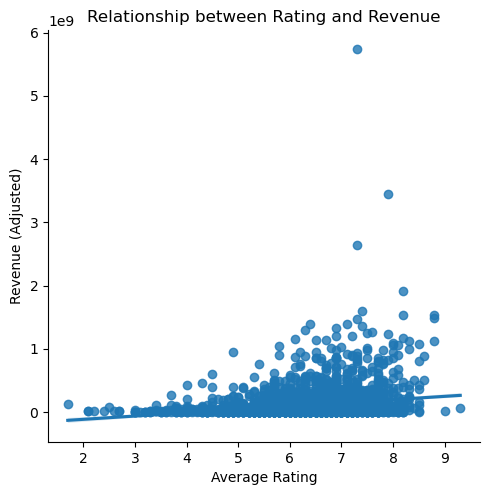

In [36]:
sns.lmplot(x='averageRating', y='revenue_final_adjusted', data=data)
plt.xlabel('Average Rating')
plt.ylabel('Revenue (Adjusted)')
plt.title('Relationship between Rating and Revenue')
plt.show()

# 4. Simple linear regression

could also add budget

In [30]:
X = data[['averageRating']]
y = data['revenue_final_adjusted']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     revenue_final_adjusted   R-squared:                       0.056
Model:                                OLS   Adj. R-squared:                  0.055
Method:                     Least Squares   F-statistic:                     104.4
Date:                    Thu, 07 Dec 2023   Prob (F-statistic):           7.65e-24
Time:                            12:15:38   Log-Likelihood:                -36823.
No. Observations:                    1765   AIC:                         7.365e+04
Df Residuals:                        1763   BIC:                         7.366e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

In [37]:
"""
# Define the independent variables (including budget) and the dependent variable
X = data[['averageRating', 'budget_adjusted']]
y = data['revenue_final_adjusted']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())
"""

"\n# Define the independent variables (including budget) and the dependent variable\nX = data[['averageRating', 'budget_adjusted']]\ny = data['revenue_final_adjusted']\n\n# Add a constant to the model (intercept)\nX = sm.add_constant(X)\n\n# Build the regression model\nmodel = sm.OLS(y, X).fit()\n\n# Print the summary of the regression model\nprint(model.summary())\n"

# 5. Residual Analysis

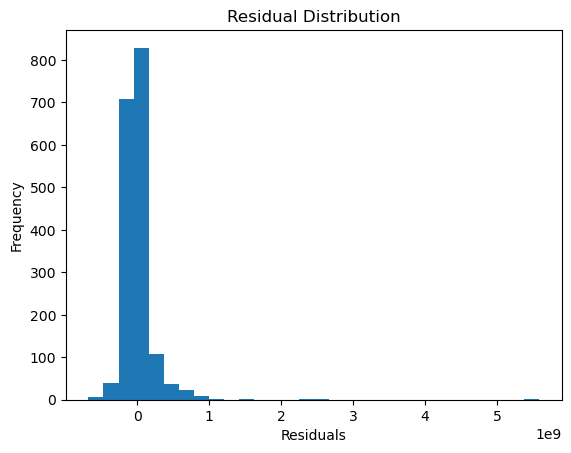

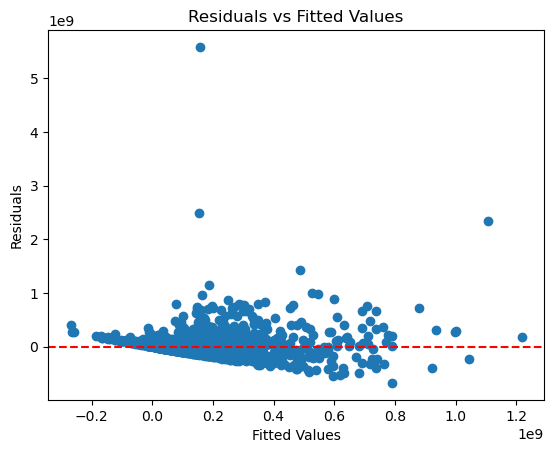

In [38]:
residuals = model.resid
plt.hist(residuals, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for residuals
plt.scatter(model.predict(), residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


# 6. Quartiles group comparison

In [39]:
quartiles = data['averageRating'].quantile([0.25, 0.5, 0.75])

# Function to categorize each movie based on its rating quartile
def rating_category(rating):
    if rating <= quartiles[0.25]:
        return 'Low'
    elif rating <= quartiles[0.5]:
        return 'Lower-Middle'
    elif rating <= quartiles[0.75]:
        return 'Upper-Middle'
    else:
        return 'High'

# Apply the function to create a new column for rating category
data['RatingCategory'] = data['averageRating'].apply(rating_category)

# Group by the new category and calculate mean revenue
average_revenues = data.groupby('RatingCategory')['revenue_final_adjusted'].mean()

# Display the results
print(average_revenues)

RatingCategory
High            1.925801e+08
Low             6.352048e+07
Lower-Middle    8.821136e+07
Upper-Middle    1.073576e+08
Name: revenue_final_adjusted, dtype: float64


# 7. Pair matching / Propensity score

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial.distance import cdist

# Assuming your DataFrame is named 'data'
# Let's say we define high ratings as being in the top 25% of your ratings

# Step 1: Define Treatment Group
high_rating_threshold = data['averageRating'].quantile(0.75)
data['high_rating'] = data['averageRating'] >= high_rating_threshold

# Step 2: Calculate Propensity Scores
# Selecting covariates that are predictors of receiving the treatment
covariates = data[['year_release', "budget_adjusted"]]  # You can add more covariates

# Logistic Regression to calculate propensity scores
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(covariates, data['high_rating'], test_size=0.33, random_state=42)
model.fit(X_train, y_train)

# Predict Propensity Scores
data['propensity_score'] = model.predict_proba(covariates)[:, 1]

# Step 3: Match Movies
# We'll perform nearest neighbor matching
high_rated_movies = data[data['high_rating']]
low_rated_movies = data[~data['high_rating']]

# Calculate distances between all high and low rated movies
distances = cdist(high_rated_movies[['propensity_score']], low_rated_movies[['propensity_score']], metric='euclidean')

# For each high rated movie, find its closest low rated match
min_distances = np.argmin(distances, axis=1)
matched_movies = low_rated_movies.iloc[min_distances]

# Step 4: Compare Outcomes
# Compare average revenue between high rated movies and their matched pairs
average_revenue_high = high_rated_movies['revenue_final_adjusted'].mean()
average_revenue_matched = matched_movies['revenue_final_adjusted'].mean()

print(f"Average Revenue for High Rated Movies: {average_revenue_high}")
print(f"Average Revenue for Matched Low Rated Movies: {average_revenue_matched}")


Average Revenue for High Rated Movies: 261543669.4929006
Average Revenue for Matched Low Rated Movies: 118989880.41987829


In [18]:
import pandas as pd
import statsmodels.formula.api as smf
import networkx as nx

def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

# Assuming the DataFrame is named 'data'
# Standardize continuous features
data['budget_adjusted_std'] = (data['budget_adjusted'] - data['budget_adjusted'].mean()) / data['budget_adjusted'].std()
data['year_release_std'] = (data['year_release'] - data['year_release'].mean()) / data['year_release'].std()

# Define high rating
high_rating_threshold = data['averageRating'].quantile(0.75)
data['high_rating'] = (data['averageRating'] >= high_rating_threshold).astype(int)


# Calculate Propensity Scores
mod = smf.logit(formula='high_rating ~ budget_adjusted_std + year_release_std', data=data)
res = mod.fit()
data['Propensity_score'] = res.predict()

# Separate the treatment and control groups
treatment_df = data[data['high_rating'].astype(bool)]
control_df = data[~data['high_rating'].astype(bool)]

# Create a Network Graph
G = nx.Graph()

# Add edges with weights based on propensity score similarity
for control_idx, control_row in control_df.iterrows():
    for treatment_idx, treatment_row in treatment_df.iterrows():
        # Weight based on the inverse of the absolute difference in propensity scores
        weight = get_similarity(control_row['Propensity_score'],treatment_row['Propensity_score'])
        G.add_edge(control_idx, treatment_idx, weight=weight)

# Find the Maximum Weight Matching
matching = nx.max_weight_matching(G, maxcardinality=True)

# Extract matched indices into a flat list
matched_indices_flat = [idx for pair in matching for idx in pair]

# Use the flat list of indices to get the matched data
matched_data = data.loc[matched_indices_flat]

# Calculate and compare average revenues
average_revenue_high = matched_data[matched_data['high_rating'].astype(bool)]['revenue_final_adjusted'].mean()
average_revenue_low = matched_data[~matched_data['high_rating'].astype(bool)]['revenue_final_adjusted'].mean()

print(f"Average Revenue for High Rated Movies: {average_revenue_high}")
print(f"Average Revenue for Matched Low Rated Movies: {average_revenue_low}")

Optimization terminated successfully.
         Current function value: 0.565112
         Iterations 5
